<center> <h1> Nome: Euline Marcos Rodrigues - RA: 850318 </h1>

<h2>IA369Y

T3 - Análise e Síntese de Emoções em Conteúdo Multimídia </h2>

<h3>Atividade 6 - Tutorial Emotion Recognition Using Facial Landmarks, Pyhton, DLib and OpenCV</h3>
</center>

Este documento contém as atividades do tutorial de van Gent, P. (2016). Emotion Recognition Using Facial Landmarks, Python, DLib and OpenCV, disponível no site http://www.paulvangent.com/2016/08/05/emotion-recognition-using-facial-landmarks/. A última visualização do site para esta atividade foi em 16/11/2017.

O tutorial começa informando quais bibliotecas e programas serão utilizados.

Optei por instalar o Anaconda com Jupyter Notebook. Como utilizo uma computador com Mac OS tive dificuldades para configurar todo o ambiente. O OpenCV para ser instalado precisou ser compilado na minha máquina. 

Para acessar estrutura de diretórios também fiz pequenas alterações nos scripts fornecidos no tutorial.

Para garantir a estabilidade da instalação criei um ambiente protegido através do comando <i>source activate</i>. 

Neste ambiente, fiz todas as instalações e inicie o notebook através do comando <i>jupyter notebook</i>.

Meu ambiente ficou assim, em relação aos principais pacotes (versões) utilizados:
- anaconda (<b>custom</b> / py35hd7b5ba2_0)  
- anaconda-client (<b>1.6.5 </b> / py35hf878a34_0)  
- boost (<b>1.59.0 </b> / py35_0    menpo)
- dlib (<b>1.4 </b> / py35_0    menpo)
- ipython (<b>6.1.0 </b> / py35h3f7db8a_1)  
- jupyter_client (<b>5.1.0 </b> / py35hfe06ecd_0)  
- jupyter_console (<b>5.2.0 </b> / py35hd2aa692_1)  
- jupyter_core (<b>4.3.0 </b> / py35h1d2ac15_0)  
- nltk (<b>3.2.4 </b> / py35hf54be8e_0)  
- notebook (<b>5.0.0 </b> / py35he0030f0_2)  
- numpy (<b>1.13.3</b> / py35hfd7066c_0)  
- opencv3 (<b>3.1.0</b> / py35_0 / menpo)
- pandas (<b>0.20.3</b> / py35h5e2f206_2)  
- python (<b>3.5.4</b>)  
- scikit-image (<b>0.13.0</b> / py35hf7e7ad6_1)  
- scikit-learn (<b>0.19.1</b> / py35h2b554eb_0) 
- scipy (<b>0.19.1</b>/ py35hf362045_3)

Testando o ambiente:

In [1]:
import cv2
import dlib
cv2.__version__

'3.1.0'

Para fazer o tutorial, foi necessário seguir também o tutorial anterior do mesmo autor, que se encontra no site http://www.paulvangent.com/2016/04/01/emotion-recognition-with-python-opencv-and-a-face-dataset/.
    
Os códigos de ambos os tutoriais foram repetidos aqui.
    
<h3>Testing the landmark detector</h3>
    
Para testar a câmera do computador e gerar imagens com pontos de interesse do rosto (action points) foi executado o código abaixo.

Através destes pontos, o algoritmo que detecta emoções pode ser utilizado. Quantos mais pontos forem utilizados, mas precisão o algoritmo pode alcançar.

O algoritmo faz uso de um conjunto de pontos que ajudam a prever a emoção. Este arquivo pode ser baixado em http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2.

In [2]:
#Import required modules
import cv2
import dlib
import time

#Set up some required objects
video_capture = cv2.VideoCapture(0) #Webcam object
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file

while True:
    ret, frame = video_capture.read()

    if not ret:
        break

    k = cv2.waitKey(1)

    if k == ord('q'): # change the original to stop capturing
        break
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        clahe_image = clahe.apply(gray)

        detections = detector(clahe_image, 1) #Detect the faces in the image

        for k,d in enumerate(detections): #For each detected face
            shape = predictor(clahe_image, d) #Get coordinates
            for i in range(1,68): #There are 68 landmark points on each face
                cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame

        cv2.imshow("image", frame) #Display the frame

   # if cv2.waitKey(1) & 0xFF == ord('q'): #Exit program when the user presses 'q'
   #     break

video_capture.release()
cv2.destroyAllWindows()

O código acima captura um video da câmera e acrescenta os 68 pontos de cada face encontrada, que o autor chama de "moving parts".

Segue uma imagem capturada deste video:

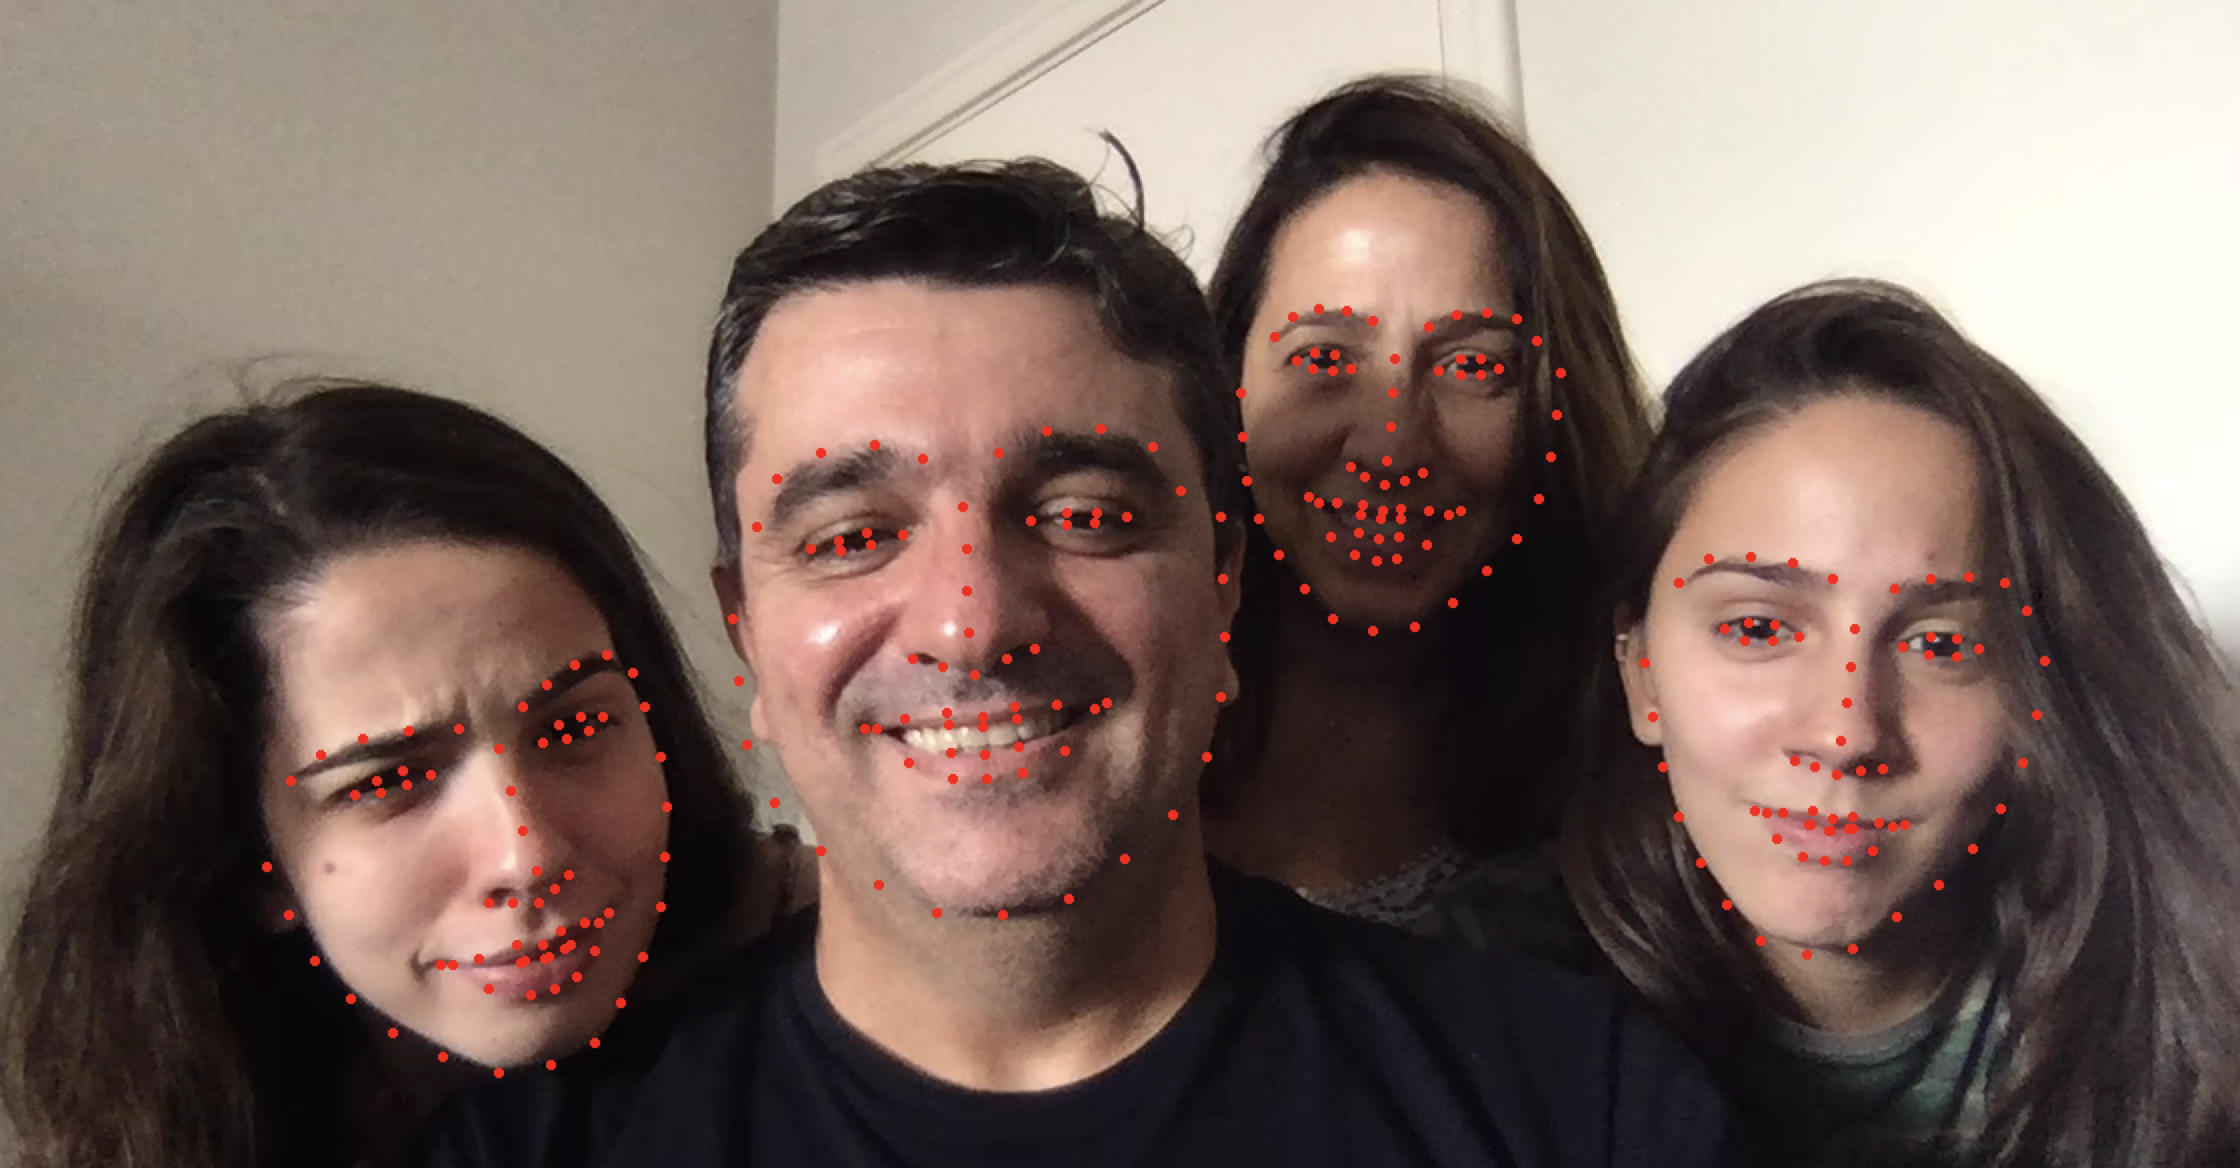

<h3>Extracting features from the faces</h3>
Os pontos detectados na imagem precisam ser classificados para que a emoção seja detectada. A classificação pode ser feita em tempo real (video) ou em imagens de fotografia. A classificação visa obter características da imagem que possam de alguma forma identificar algo que o pesquisador (ou usuário) deseja encontrar. Estas características são conhecidas como features. 

Aqui, talvez, resida o ponto alto do tutorial, que é como extrair as features de uma imagem e fornecer dados confiáveis para o classificador. O autor, então, discorre como fazer um pré processamento nas imagens para se chegar aos pontos "confiáveis" de uma face. Ele cita como uma dificuldade encontrar o centro de gravidade de uma imagem. Poderia ser a ponta do nariz, mas ele decide implementar como cento da imagem o ponto que é o centro das coordenadas obtidas. 

Para fazer isto, o código abaixo foi alterado (é o mesmo código anterior com as alterações para escolha achar o centro de gravidade de cada imagem.


In [3]:
def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
        xmean = np.mean(xlist) #Find both coordinates of centre of gravity
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist] #Calculate distance centre <-> other points in both axes
        ycentral = [(y-ymean) for y in ylist]
        
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))

        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1: 
        data['landmarks_vestorised'] = "error"
        return landmarks

Agora o autor cita o tutorial anterior, onde o classificador entra em ação.

Para isto, serão executados os scripts do tutorial anterior.

A base utilizada foi o dataset CK+, de Cohn-Kanade (Kanade, T., Cohn, J. F., & Tian, Y. (2000)), baixado do site http://www.consortium.ri.cmu.edu/ckagree/.

O tutorial faz a extração de duas imagens de cada conjunto: uma neutra (a primeira imagem) e a outra com uma emoção representada (a última imagem).

O modelo de emoções adotado é o proposto por Paul Ekman e que considera as seguintes emoções:
- neutro/neutral (sem emoção definida) 
- raiva/anger
- desprezo/contempt
- desgosto/disgust
- medo/fear
- feliz/happy
- tristeza/sadness
- surpresa/surprise

O código abaixo foi executado para selecionar estas imagens.

In [4]:
import glob
from shutil import copyfile

emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"] #Define emotion order
participants = glob.glob("source_emotion//*") #Returns a list of all folders with participant numbers

for x in participants:
    part = "%s" %x[-4:] #store current participant number
    for sessions in glob.glob("%s//*" %x): #Store list of sessions for current participant
        for files in glob.glob("%s//*" %sessions):
            current_session = files[20:-30]
            file = open(files, 'r')
            
            emotion = int(float(file.readline())) #emotions are encoded as a float, readline as float, then convert to integer.
            
            sourcefile_emotion = glob.glob("source_images//%s//%s//*" %(part, current_session))[-1] #get path for last image in sequence, which contains the emotion
            sourcefile_neutral = glob.glob("source_images//%s//%s//*" %(part, current_session))[0] #do same for neutral image
            
            dest_neut = "sorted_set//neutral//%s" %sourcefile_neutral[25:] #Generate path to put neutral image
            dest_emot = "sorted_set//%s//%s" %(emotions[emotion], sourcefile_emotion[25:]) #Do same for emotion containing image
            
            copyfile(sourcefile_neutral, dest_neut) #Copy file
            copyfile(sourcefile_emotion, dest_emot) #Copy file


<h3>Extracting Faces</h3>
Para melhorar a performance do classificador, foram utilizadas pedaços de cada imagem somente com as faces. 

O OpenCV possui um filtro chamado HAAR que possui 4 classificadores pré-treinados que ajuadam a idenficar faces numa imagem. 

Estes classificadores podem ser baixados em http://www.paulvangent.com/wp-content/uploads/2016/04/OpenCV_FaceCascade.zip. 

O código abaixo foi executado para obter apenas as faces, deixar as imagens em tons de cinza e também num tamanho único para todas as imagens.

In [5]:
import cv2
import glob

faceDet = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("haarcascade_frontalface_alt_tree.xml")

emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"] #Define emotions

def detect_faces(emotion):
    files = glob.glob("sorted_set//%s//*" %emotion) #Get list of all images with emotion

    filenumber = 0
    for f in files:
        frame = cv2.imread(f) #Open image
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
        
        #Detect face using 4 different classifiers
        face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

        #Go over detected faces, stop at first detected face, return empty if no face.
        if len(face) == 1:
            facefeatures = face
        elif len(face_two) == 1:
            facefeatures = face_two
        elif len(face_three) == 1:
            facefeatures = face_three
        elif len(face_four) == 1:
            facefeatures = face_four
        else:
            facefeatures = ""
        
        #Cut and save face
        for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
            print ("face found in file: %s" %f)
            gray = gray[y:y+h, x:x+w] #Cut the frame to size
            
            try:
                out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
                cv2.imwrite("dataset//%s//%s.jpg" %(emotion, filenumber), out) #Write image
            except:
               pass #If error, pass file
        filenumber += 1 #Increment image number

for emotion in emotions: 
    detect_faces(emotion) #Call functiona


face found in file: sorted_set//neutral/S005_001_00000001.png
face found in file: sorted_set//neutral/S010_002_00000001.png
face found in file: sorted_set//neutral/S010_004_00000001.png
face found in file: sorted_set//neutral/S010_006_00000001.png
face found in file: sorted_set//neutral/S011_001_00000001.png
face found in file: sorted_set//neutral/S011_002_00000001.png
face found in file: sorted_set//neutral/S011_003_00000001.png
face found in file: sorted_set//neutral/S011_004_00000001.png
face found in file: sorted_set//neutral/S011_005_00000001.png
face found in file: sorted_set//neutral/S011_006_00000001.png
face found in file: sorted_set//neutral/S014_001_00000001.png
face found in file: sorted_set//neutral/S014_002_00000001.png
face found in file: sorted_set//neutral/S014_003_00000001.png
face found in file: sorted_set//neutral/S014_005_00000001.png
face found in file: sorted_set//neutral/S022_001_00000001.png
face found in file: sorted_set//neutral/S022_005_00000001.png
face fou

face found in file: sorted_set//neutral/S075_008_00000001.png
face found in file: sorted_set//neutral/S076_001_00000001.png
face found in file: sorted_set//neutral/S076_005_00000001.png
face found in file: sorted_set//neutral/S076_006_00000001.png
face found in file: sorted_set//neutral/S077_001_00000001.png
face found in file: sorted_set//neutral/S077_006_00000001.png
face found in file: sorted_set//neutral/S078_001_00000001.png
face found in file: sorted_set//neutral/S078_004_00000001.png
face found in file: sorted_set//neutral/S078_007_00000001.png
face found in file: sorted_set//neutral/S079_001_00000001.png
face found in file: sorted_set//neutral/S079_002_00000001.png
face found in file: sorted_set//neutral/S079_004_00000001.png
face found in file: sorted_set//neutral/S080_001_00000001.png
face found in file: sorted_set//neutral/S080_005_00000001.png
face found in file: sorted_set//neutral/S080_008_00000001.png
face found in file: sorted_set//neutral/S081_001_00000001.png
face fou

face found in file: sorted_set//neutral/S131_003_00000001.png
face found in file: sorted_set//neutral/S131_006_00000001.png
face found in file: sorted_set//neutral/S131_010_00000001.png
face found in file: sorted_set//neutral/S132_002_00000001.png
face found in file: sorted_set//neutral/S132_003_00000001.png
face found in file: sorted_set//neutral/S132_005_00000001.png
face found in file: sorted_set//neutral/S132_006_00000001.png
face found in file: sorted_set//neutral/S132_008_00000001.png
face found in file: sorted_set//neutral/S133_003_00000001.png
face found in file: sorted_set//neutral/S133_009_00000001.png
face found in file: sorted_set//neutral/S133_010_00000001.png
face found in file: sorted_set//neutral/S134_003_00000001.png
face found in file: sorted_set//neutral/S134_004_00000001.png
face found in file: sorted_set//neutral/S134_008_00000001.png
face found in file: sorted_set//neutral/S135_001_00000001.png
face found in file: sorted_set//neutral/S135_012_00000001.png
face fou

face found in file: sorted_set//disgust/S054_004_00000024.png
face found in file: sorted_set//disgust/S055_003_00000009.png
face found in file: sorted_set//disgust/S056_002_00000010.png
face found in file: sorted_set//disgust/S057_003_00000015.png
face found in file: sorted_set//disgust/S058_006_00000018.png
face found in file: sorted_set//disgust/S060_005_00000021.png
face found in file: sorted_set//disgust/S061_004_00000022.png
face found in file: sorted_set//disgust/S062_005_00000029.png
face found in file: sorted_set//disgust/S065_005_00000008.png
face found in file: sorted_set//disgust/S067_006_00000011.png
face found in file: sorted_set//disgust/S068_005_00000021.png
face found in file: sorted_set//disgust/S069_003_00000011.png
face found in file: sorted_set//disgust/S070_005_00000016.png
face found in file: sorted_set//disgust/S071_006_00000014.png
face found in file: sorted_set//disgust/S073_006_00000014.png
face found in file: sorted_set//disgust/S074_004_00000018.png
face fou

face found in file: sorted_set//happy/S132_006_00000023.png
face found in file: sorted_set//happy/S133_010_00000014.png
face found in file: sorted_set//happy/S134_004_00000015.png
face found in file: sorted_set//happy/S135_012_00000020.png
face found in file: sorted_set//happy/S136_006_00000020.png
face found in file: sorted_set//happy/S137_011_00000020.png
face found in file: sorted_set//happy/S138_005_00000016.png
face found in file: sorted_set//sadness/S011_002_00000022.png
face found in file: sorted_set//sadness/S014_002_00000016.png
face found in file: sorted_set//sadness/S026_002_00000016.png
face found in file: sorted_set//sadness/S042_002_00000016.png
face found in file: sorted_set//sadness/S046_001_00000025.png
face found in file: sorted_set//sadness/S064_004_00000014.png
face found in file: sorted_set//sadness/S066_004_00000010.png
face found in file: sorted_set//sadness/S071_002_00000020.png
face found in file: sorted_set//sadness/S080_005_00000013.png
face found in file: so

<h3>Classification, training and execution</h3>
Após todo este processamento, a próxima etapa é classificar as imagens de acordo com as emoções.

Seguindo uma boa prática dos algoritmos de aprendizagem, a base foi dividida em duas partes, sendo que uma parte ficou com 80% das imagens para efeito de treinamento. Os 20% restantes das imagens ficou para classificar as imagens.

O autor sugere mover as imagens cuja predição não estão de acordo com a classificação prévia, para uma outra pasta para posterior ajuste.

Feitas todos os ajustes, chegou a hora de executar em cima de cada base de imagem de emoções classificadas e verificar os resultados.

Foi usado um classificador SVM (do inglês: support vector machine). Em aprendizagem de máquina, SVM tem um conjunto de métodos supervisionados que analisam os dados e reconhecem padrões (features), que no tutorial seriam padrões de emições.


In [7]:
import cv2
import glob
import random
import math
import numpy as np
import dlib
import itertools
from sklearn.svm import SVC

emotions = ["anger", "contempt", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"] #Emotion list
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Or set this to whatever you named the downloaded file
clf = SVC(kernel='linear', probability=True, tol=1e-3)#, verbose = True) #Set the classifier as a support vector machines with polynomial kernel

data = {} #Make dictionary for all values
#data['landmarks_vectorised'] = []

def get_files(emotion): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("dataset//%s//*" %emotion)
    random.shuffle(files)
    training = files[:int(len(files)*0.8)] #get first 80% of file list
    prediction = files[-int(len(files)*0.2):] #get last 20% of file list
    return training, prediction

def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]

        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))

        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1: 
        data['landmarks_vestorised'] = "error"

def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []
    for emotion in emotions:
        print(" working on %s" %emotion)
        training, prediction = get_files(emotion)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            clahe_image = clahe.apply(gray)
            get_landmarks(clahe_image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                training_data.append(data['landmarks_vectorised']) #append image array to training data list
                training_labels.append(emotions.index(emotion))
    
        for item in prediction:
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            clahe_image = clahe.apply(gray)
            get_landmarks(clahe_image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                prediction_data.append(data['landmarks_vectorised'])
                prediction_labels.append(emotions.index(emotion))

    return training_data, training_labels, prediction_data, prediction_labels   

accur_lin = []
for i in range(0,10):
    print("Making sets %s" %i) #Make sets by random sampling 80/20%
    training_data, training_labels, prediction_data, prediction_labels = make_sets()

    npar_train = np.array(training_data) #Turn the training set into a numpy array for the classifier
    npar_trainlabs = np.array(training_labels)
    print("training SVM linear %s" %i) #train SVM
    clf.fit(npar_train, training_labels)

    print("getting accuracies %s" %i) #Use score() function to get accuracy
    npar_pred = np.array(prediction_data)
    pred_lin = clf.score(npar_pred, prediction_labels)
    print ("linear: ", pred_lin)
    accur_lin.append(pred_lin) #Store accuracy in a list

print("Mean value SVM linear: %s" %np.mean(accur_lin)) #FGet mean accuracy of the 10 runs


Making sets 0
 working on anger
 working on contempt
 working on disgust
 working on fear
 working on happiness
 working on neutral
 working on sadness
 working on surprise
training SVM linear 0
getting accuracies 0
linear:  0.824561403509
Making sets 1
 working on anger
 working on contempt
 working on disgust
 working on fear
 working on happiness
 working on neutral
 working on sadness
 working on surprise
training SVM linear 1
getting accuracies 1
linear:  0.842105263158
Making sets 2
 working on anger
 working on contempt
 working on disgust
 working on fear
 working on happiness
 working on neutral
 working on sadness
 working on surprise
training SVM linear 2
getting accuracies 2
linear:  0.824561403509
Making sets 3
 working on anger
 working on contempt
 working on disgust
 working on fear
 working on happiness
 working on neutral
 working on sadness
 working on surprise
training SVM linear 3
getting accuracies 3
linear:  0.850877192982
Making sets 4
 working on anger
 working

<h3>Results</h3>
Em relação ao tutorial anterior, o uso dos landmarks (faciais) melhorou a performance do classificador SVM comparado ao classificador Fisher. E isto era o desejado: melhorar a acurácia da previsão.

Em números:

| Classificador | Resultado 
|---------------|:---------:
| Fischer       |  69.3%    
| SVM Linear    |  83.6%    


Teoricamente a inclusão de mais features deveria levar a uma acurácia superior, mas há vários fatores que influenciam isto, desde o tamanhos das bases, o treinamento, os algoritmos para classificar.

O ajuste do ambiente no Mac Book foi bem demorado, mas valeu a pena pois permitiu o contato com outras técnicas que ainda não conhecia, dentre elas a criação de ambientes "confinados" para realizar os experimentos.

Outro ganho importante foi poder usar bibliotecas Python juntamente com bibliotecas C/C++ e tirar proveito da infinidade de recursos que o OpenCV disponibiliza para manipulação de imagens.
